In [16]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [121]:
# meat_T0 = 40
grill_temp = 250
target_temp = 165

measurements_t = [0,10,20,30]
measurements_T = [40,50,60,65]

# temp_check_1_elapsed_min = 10
# temp_check_1_T_meat = 50

In [122]:
# dT/dt = k(T_meat-T_amb)

In [123]:
T0 = measurements_T[0]
def get_model(k):
    return lambda T, t: k * (T - grill_temp)

# k_global=0.1
# def model(T,t):
#     return k_global * (T - grill_temp)

def obj_function(k):
    # print("testing: {}".format(k))
    sse = 0
    model = get_model(k)
    # print("model: {}".format(model))
    # k_global = k
    for index, t in enumerate(measurements_t):
        # print("calling odeint: {}, {}".format(T0, t))
        val = odeint(model, T0, np.linspace(0,t))
        predicted_val = val[len(val)-1]
        # print("predicted: {}".format(val))
        residual = predicted_val - measurements_T[index]
        sse += residual ** 2

    return sse

result = minimize(obj_function, -0.1)
print("Fitted k: {}".format(result.x[0]))

Fitted k: -0.004511265387590838


In [124]:
max_cook_minutes = 24 * 60
t = np.linspace(0,max_cook_minutes,max_cook_minutes)
projected_temp = odeint(get_model(result.x[0]),measurements_T[0],t)

t_final = -1
for index,temp in enumerate(projected_temp):
    if temp >= target_temp:
        t_final = index
        # print("t_final: {} {} {}".format(index, temp, target_temp))
        break

if t_final == -1:
    print("Target temp will not be reached within {} minutes".format(t[len(t)-1]))
else:
    print("Target temp will be reached at {} minutes".format(t_final))


Target temp will be reached at 201 minutes


t_final_plot: 241


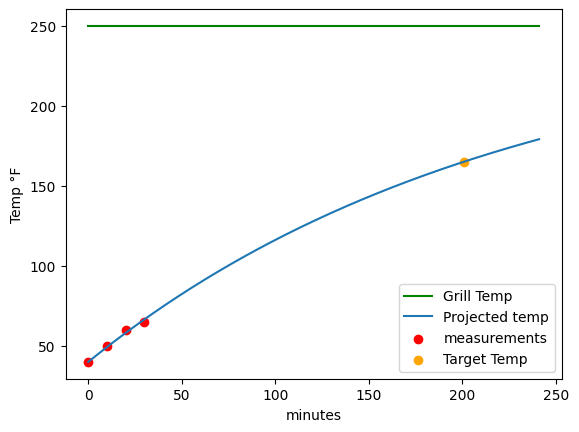

In [127]:
# plot results
if t_final == -1:
    t_final_result = max_cook_minutes
else:
    t_final_result = t_final

t_final_plot = int(t_final_result * 1.2)
print("t_final_plot: {}".format(t_final_plot))
plot_t = np.linspace(0,t_final_plot,t_final_plot)
plot_projected_temp = odeint(get_model(result.x[0]),measurements_T[0],plot_t)

grill_temp_plot = np.ones(t_final_plot) * grill_temp


plt.plot(plot_t, grill_temp_plot, color='green', label='Grill Temp')
plt.plot(plot_t,plot_projected_temp, label='Projected temp')
plt.scatter(measurements_t, measurements_T, color='red', label='measurements')
plt.scatter([t_final_result],[plot_projected_temp[t_final_result-1]], color='orange', label='Target Temp')
plt.xlabel('minutes')
plt.ylabel('Temp °F')
plt.legend()
plt.show()

In [113]:
plot_projected_temp[t_final-1]

array([165.11658487])

In [126]:
np.ones(10)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])